| Heading | Description |
|-|-|
| Author: | Ja`Mone Bridges |
| Project: | NLP With Hotel Reviews |


Introduction:
I am tasked with performing analysis to better understand which qualities of hotel stay contribute to higher customer satisfaction.  The data set of customer reviews has 515738 rows and 29 features.

| Contents |
|----------|
| [EDA and Cleanup](#eda-and-cleanup) |
| [Preprocessing](#preprocessing) |
| [Modelling](#modelling) |
| [Conclusion](#conclusion) |

In [1]:
# import the basic modules to start
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from numpy.polynomial.polynomial import polyfit

# EDA and Cleanup

In [2]:
hr_df = pd.read_csv('data/Hotel_Reviews.csv')
# Verifying that the file is loaded
hr_df.head()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2


### The columns with the customer reviews are Negative_Review and Positive Review.  The column of Review_Score contains the Y variable of zero or one. Zero represents an unsatisfied customer while one represent a satisfied customer.

In [3]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,515738.0,257868.500000,148880.880903,0.000000,128934.250000,257868.500000,386802.750000,515737.000000
Additional_Number_of_Scoring,515738.0,498.081836,500.538467,1.000000,169.000000,341.000000,660.000000,2682.000000
Average_Score,515738.0,8.397487,0.548048,5.200000,8.100000,8.400000,8.800000,9.800000
Review_Total_Negative_Word_Counts,515738.0,18.539450,29.690831,0.000000,2.000000,9.000000,23.000000,408.000000
Total_Number_of_Reviews,515738.0,2743.743944,2317.464868,43.000000,1161.000000,2134.000000,3613.000000,16670.000000
Review_Total_Positive_Word_Counts,515738.0,17.776458,21.804185,0.000000,5.000000,11.000000,22.000000,395.000000
Total_Number_of_Reviews_Reviewer_Has_Given,515738.0,7.166001,11.040228,1.000000,1.000000,3.000000,8.000000,355.000000
Reviewer_Score,515738.0,0.570006,0.495075,0.000000,0.000000,1.000000,1.000000,1.000000
Days_Since_Review,515738.0,354.441932,208.928124,0.000000,175.000000,353.000000,527.000000,730.000000
Latitude,515738.0,49.432419,3.460237,41.328376,48.214066,51.499981,51.516288,52.400181


> #### Unnamed: 0 is a column with the index. It is a duplicate of the index and must be dropped.

In [4]:
hr_df = hr_df.drop(columns='Unnamed: 0')

In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 

### There are no NULL or NAN rows. All the columns are of the correct data type.

In [6]:
hr_df.duplicated().sum()

539

### There are 539 Duplicates. Since the total amount of rows are 515738 then 539 / 515738 * 100 = 0.10%.  These rows can be safely dropped.

In [7]:
hr_df = hr_df.drop_duplicates()

In [8]:
# Verify that the duplicate rows are dropped.
hr_df.duplicated().sum()

0

### The next step is to replace columns Year, Month, and Day with the Datetime format and review the original columns.

In [9]:
hr_df['Date'] = pd.to_datetime(hr_df[['Year', 'Month', 'Day']])

In [10]:
# Verify that the new column has been added correctly.
hr_df[['Year', 'Month', 'Day', 'Date']].head()

,Year,Month,Day,Date
0,2017,8,3,2017-08-03
1,2017,8,3,2017-08-03
2,2017,7,31,2017-07-31
3,2017,7,31,2017-07-31
4,2017,7,24,2017-07-24


In [11]:
hr_df = hr_df.drop(columns=['Year', 'Month', 'Day'])
# Verify that the columns are dropped.
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Additional_Number_of_Scoring                515199 non-null  int64         
 1   Average_Score                               515199 non-null  float64       
 2   Negative_Review                             515199 non-null  object        
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64         
 4   Total_Number_of_Reviews                     515199 non-null  int64         
 5   Positive_Review                             515199 non-null  object        
 6   Review_Total_Positive_Word_Counts           515199 non-null  int64         
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64         
 8   Reviewer_Score                              515199 non-null  int64         
 9 

#### I want to check if column 'Total_Number_of_Reviews' match the number of reviews by location. I start by checking the first row location.  

In [12]:
hr_df[['Latitude', 'Longitude' ]].iloc[0,:]

Latitude     52.360576
Longitude     4.915968
Name: 0, dtype: float64

#### The first hotel has 405 reviews in the dataset and the column of Total reviews state that there are 1403 reviews. I am going to check if Total_Number_of_Review corresponds to multiple hotels.

In [13]:
# On the first row check the total reviews for the hotel versus Total_Number_of_Reviews.
hr_df[(hr_df['Latitude'] > 52.360575) & (hr_df['Latitude'] < 52.360577) & (hr_df['Longitude'] > 4.915967) & (hr_df['Longitude'] < 4.915969)].describe().T

,count,mean,min,25%,50%,75%,max,std
Additional_Number_of_Scoring,405.0,194.0,194.0,194.0,194.0,194.0,194.0,0.0
Average_Score,405.0,7.7,7.7,7.7,7.7,7.7,7.7,0.0
Review_Total_Negative_Word_Counts,405.0,30.8,0.0,3.0,15.0,39.0,397.0,46.658566
Total_Number_of_Reviews,405.0,1403.0,1403.0,1403.0,1403.0,1403.0,1403.0,0.0
Review_Total_Positive_Word_Counts,405.0,23.639506,0.0,7.0,15.0,31.0,186.0,26.264806
Total_Number_of_Reviews_Reviewer_Has_Given,405.0,5.977778,1.0,1.0,2.0,7.0,85.0,9.849461
Reviewer_Score,405.0,0.459259,0.0,0.0,0.0,1.0,1.0,0.498954
Days_Since_Review,405.0,393.832099,0.0,185.0,439.0,581.0,730.0,225.201145
Latitude,405.0,52.360576,52.360576,52.360576,52.360576,52.360576,52.360576,0.0
Longitude,405.0,4.915968,4.915968,4.915968,4.915968,4.915968,4.915968,0.0


In [14]:
hr_df[(hr_df['Total_Number_of_Reviews'] == 1403)].describe().T

,count,mean,min,25%,50%,75%,max,std
Additional_Number_of_Scoring,685.0,170.70073,137.0,137.0,194.0,194.0,194.0,28.041939
Average_Score,685.0,8.027007,7.7,7.7,7.7,8.5,8.5,0.393571
Review_Total_Negative_Word_Counts,685.0,25.036496,0.0,2.0,12.0,33.0,397.0,39.470992
Total_Number_of_Reviews,685.0,1403.0,1403.0,1403.0,1403.0,1403.0,1403.0,0.0
Review_Total_Positive_Word_Counts,685.0,21.529927,0.0,6.0,13.0,28.0,307.0,26.151008
Total_Number_of_Reviews_Reviewer_Has_Given,685.0,5.966423,1.0,1.0,2.0,6.0,85.0,9.463861
Reviewer_Score,685.0,0.531387,0.0,0.0,1.0,1.0,1.0,0.499379
Days_Since_Review,685.0,383.70073,0.0,185.0,394.0,576.0,730.0,221.876677
Latitude,685.0,47.875009,41.386956,41.386956,52.360576,52.360576,52.360576,5.398624
Longitude,685.0,3.792112,2.166534,2.166534,4.915968,4.915968,4.915968,1.352622


#### First table shows column Total_Number_of_Reviews and the second table shows the number of reviews in the dataset.

In [15]:

display(hr_df[['Latitude', 'Longitude', 'Total_Number_of_Reviews']].sort_values(['Latitude', 'Longitude'], ascending=True).groupby(['Latitude', 'Longitude', 'Total_Number_of_Reviews']).count())
display(hr_df[['Latitude', 'Longitude']].value_counts().sort_index(ascending=True))

,,
Latitude,Longitude,Total_Number_of_Reviews
41.328376,2.112964,2521
41.368437,2.190153,2708
41.370304,2.171410,977
41.371308,2.181698,4559
41.372525,2.154079,494
...,...,...
52.385649,4.834443,5018
52.387288,4.834975,3643
52.392368,4.911044,734


Latitude   Longitude
41.328376  2.112964      571
41.368437  2.190153      575
41.370304  2.171410      229
41.371308  2.181698     1082
41.372525  2.154079      120
                        ... 
52.385649  4.834443     1071
52.387288  4.834975      856
52.392368  4.911044      143
52.392490  4.868382      467
52.400181  4.893665      312
Name: count, Length: 1489, dtype: int64

### This data set is missing 73.34% of the reviews. For the sake of simplicity I will assume that a truly random sample was taken from the original dataset. Also, that this dataset is a representative sample of the actual customer reviews.

In [16]:
# The table shows that there is mismatch between Total_Number_of_Reviews versus Actual_Reviews_in_Dataset
temp_df = hr_df[['Latitude', 'Longitude', 'Total_Number_of_Reviews']].sort_values(['Latitude', 'Longitude'], ascending=True).groupby(['Latitude', 'Longitude']).mean()
temp_df['Actual_Reviews_in_Dataset'] = hr_df[['Latitude', 'Longitude']].value_counts().sort_index(ascending=True)
temp_df['Difference_in_Review_Count'] = temp_df['Total_Number_of_Reviews'] - temp_df['Actual_Reviews_in_Dataset']
display(temp_df.sort_values('Total_Number_of_Reviews', ascending=False).head(10))
display('The percentage of missing values: ' + str(temp_df['Difference_in_Review_Count'].sum() / temp_df['Total_Number_of_Reviews'].sum() * 100.0) + '%')


,,Total_Number_of_Reviews,Actual_Reviews_in_Dataset,Difference_in_Review_Count
Latitude,Longitude,,,
45.533137,9.171102,16670.0,1876,14794.0
51.500961,-0.116591,12158.0,4169,7989.0
45.525722,9.215003,10842.0,1118,9724.0
51.511099,-0.120867,9568.0,4256,5312.0
51.501910,-0.023221,9086.0,4789,4297.0
52.351114,4.841163,8177.0,1809,6368.0
52.354665,4.913164,7656.0,1576,6080.0
52.385601,4.847060,7586.0,1686,5900.0
51.510841,-0.078058,7491.0,3212,4279.0


'The percentage of missing values: 73.33628945221645%'

> #### Average_Score column maybe connected to Total_Number_of_Reviews but no direct link can be proven.
> #### The Average_Score and Total_Number_of_Reviews columns are being kept as feature for further analysis but may be dropped at a later point.
> #### There may be a link between Average_Score and Reviewer_Score. I will create a plot to investigate.

,,Average_Score,Reviewer_Score_Mean
Latitude,Longitude,,
41.328376,2.112964,7.8,0.383538
41.368437,2.190153,8.5,0.603478
41.370304,2.171410,8.7,0.672489
41.371308,2.181698,8.5,0.596118
41.372525,2.154079,8.8,0.750000
...,...,...,...
52.385649,4.834443,8.6,0.727358
52.387288,4.834975,8.6,0.644860
52.392368,4.911044,8.2,0.531469


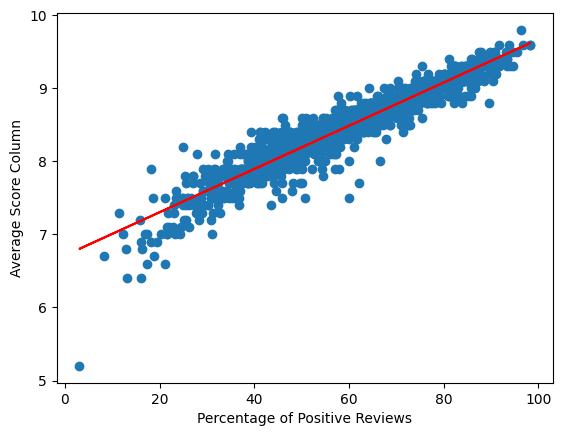

In [17]:
temp_df = hr_df[['Latitude', 'Longitude', 'Average_Score']].sort_values(['Latitude', 'Longitude'], ascending=True).groupby(['Latitude', 'Longitude']).mean()
temp_df['Reviewer_Score_Mean'] = hr_df[['Latitude', 'Longitude', 'Reviewer_Score']].sort_values(['Latitude', 'Longitude'], ascending=True).groupby(['Latitude', 'Longitude']).mean()
display(temp_df)
X = temp_df['Reviewer_Score_Mean'] * 100.0
y = temp_df['Average_Score']
plt.figure()
b, m = polyfit(X, y, 1)
plt.scatter(X, y)
plt.plot(X, b + m * X, '-', color='r')
plt.xlabel('Percentage of Positive Reviews')
plt.ylabel('Average Score Column')
plt.show()



#### There is a very strong corelation between the Average_Score column and the percentage of positive reviewer scores.  The decision point for making a review positive appears to be a score of 8.0. The reason that 8.0 may be the decision point is because it has a positive percentage of 50 percent.

#### Hotels have to focus on getting scores above 8.0 on average. The graph above suggest that a small improvement in average customer score leads to a greater increase in percentage of positive reviews. This is because on a scale of one to ten, most of the scores are skewed toward five to ten. In effect an average increase in score from 7.0 to 8.0 will result in over a 20% increase in positive reviews.

#### People on leisure trips rated hotels better on average than non-leisure trips.  People on leisure trips also stayed longer on average than people on non-leisure trips.

In [18]:
reviewer = hr_df[['Reviewer_Score', 'Nights_Stayed', 'Leisure_Trip']].groupby('Leisure_Trip').mean()
reviewer

,Reviewer_Score,Nights_Stayed
Leisure_Trip,,
0,0.466787,2.246352
1,0.594323,2.388806


#### The following graph shows the average reviewer score and days since that review.  This shows how the score have changed over time.  These scores also hint at seasonality by the observable wave pattern in the scatter plot. The trend line shows a slight decrease over time. This means that hotels scores on average have improved.

#### This suggest that hotels should focus on leisure trip customers because the hotels will have higher customer satisfaction and longer stays.

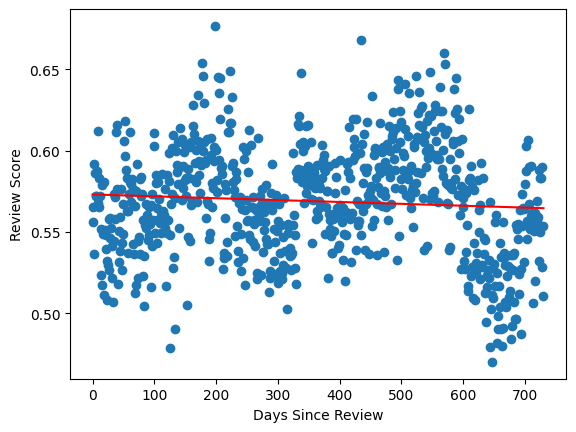

In [19]:
days_df = hr_df[['Days_Since_Review', 'Reviewer_Score']].groupby('Days_Since_Review').mean()
plt.figure()
y = days_df['Reviewer_Score']
X = days_df.index.values
plt.scatter(X, y)
b, m = polyfit(X, y, 1)
plt.plot(X, b + m * X, '-', color='r')
plt.xlabel('Days Since Review')
plt.ylabel('Review Score')
plt.show()

### The following function fixes some of the times in the text and coverts all time to 24 separate 1 hour blocks. The idea is to group similar times together so that the time block frequency occurs more often exact times. This may help the ML process the data in a more useful manner.  

In [ ]:
# This corrects most of the times to 24 hour time and rounds down to the
# nearest hour. It takes around 90 minutes to run this code block.

def AddSpace(match_obj):
    return match_obj.group(1) + match_obj.group(2) + ' ' + match_obj.group(3)

# Coverts time into 24 hour block time
def TimeFix12Hour(match_obj):
    if match_obj.group(3) is not None:
        # 4 digit time
        time =  match_obj.group(3)
        if (match_obj.group(4)[1] == "P" or match_obj.group(4)[1] == "p") and int(time[0:2]) != 12:
            time = str(int(time) + 1200)
        print("time: " + str(time) + " Return: " + str(time[0:2]) + ":00" + " 4 Digit 12 Hour Time")
        return time[0:2] + ':00'
    else:
        # 3 digit time
        time =  match_obj.group(5)
        if match_obj.group(6)[1] == "P" or match_obj.group(6)[1] == "p":
            time = str(int(time) + 1200)
        print("time: " + str(time) + " Return: " + str(time[0]) + ':00' + " 3 Digit 12 Hour Time")
        return time[0] + ':00'
        
def TimeFix24Hour(match_obj):
    if match_obj.group(3) is not None:
        # 4 digit time
        time =  match_obj.group(3)
        print("time: " + str(time) + " Return: " + str(time[0:2]) + ":00" + " 4 Digit 24 Hour Time")
        return time[0:2] + ':00'

def Time24HourBlock(match_obj):
    time = match_obj.group(4)
    print(time)
    if time[1] == ':' or time[1] == ' ' or time[1] == '_' or time[1] == '-':
        time = '0' + time[0] + '00'
    else:
        time = time[0:2] + "00"
    if match_obj.group(6) is not None:
        if (match_obj.group(6)[0] == 'P' or match_obj.group(6)[0] == 'p') and int(time[0:2]) != 12:
            str(int(time) + 1200)
    print('Time 24 Block: ' + str(time[0:2]) + ':' + str(time[2:]))
    return time[0:2] + ':' + time[2:]

# Clean up numbers
def CleanNumbers(text):
    new_text = ''
    # Remove leading spaces
    new_text = re.sub(r'^\s+', '', text)
    # Remove leading zeros
    new_text = re.sub(r'^|\s+0+', '', new_text)
    # Separate numbers from letters
    new_text = re.sub(r'(^|\s+)([0-9]+)([a-zA-Z])', AddSpace, new_text)
    # Fix 12 hour time
    new_text = re.sub(r'(^|\s+)(([0-9]{4})([ ][aA][mM]|[pP][mM]))|([0-9]{3})([ ][aA][mM]|[pP][mM])', TimeFix12Hour, new_text)
    # Fix 24 hour time
    new_text = re.sub(r'(^|\s+)(([0-9]{4})([ ][hH]))', TimeFix24Hour, new_text)
    # Covert Time into 24 Hour blocks
    new_text = re.sub(r'(^|\s+)((([0-9]{1,2}[:-_\s][0-9]{2})([ ]([Aa][mM]|[pP][mM]))))', Time24HourBlock, new_text)

    if new_text is not None:
        return new_text
    else:
        return text
i = 0
size = hr_df.shape[0]
while i < size:
    # Positive Reviews
    hr_df.iloc[i,5] = CleanNumbers(hr_df.iloc[i,5])
    # Negative Reviews
    hr_df.iloc[i,2] = CleanNumbers(hr_df.iloc[i,2])
    
    if i % 10000 == 0:
        print(i)
    i += 1

In [ ]:
# Saves the time corrections to file.

#hr_df.to_csv("./data/Hotel_Reviews_Time_Corrected.csv")

#### Save Check point. Load data and perform sanity check.

In [21]:
# Loads the time corrected dataframe from file to prevent 90 minute run time
# on time corrections.
hr_df = pd.read_csv('data/Hotel_Reviews_Time_Corrected.csv', index_col=0)
hr_df.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed,Date
0,194,7.7,I am so angry that i made this post available ...,397,1403,Only the park outside of the hotel was beautiful,11,7,0,0,...,1,1,0,0,0,0,0,1,6,2017-08-03
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great l...,105,7,0,0,...,0,1,0,0,0,0,0,1,4,2017-08-03
2,194,7.7,Rooms are nice but for elderly a bit difficult...,42,1403,Location was good and staff were ok It is cute...,21,9,0,3,...,0,1,0,0,0,0,0,1,3,2017-07-31
3,194,7.7,My room was dirty and I was afraid to walk bar...,210,1403,Great location in nice surroundings the bar an...,26,1,0,3,...,0,1,0,0,0,0,0,1,3,2017-07-31
4,194,7.7,You When I booked with your company on line yo...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,1,1,0,0,0,0,0,1,2,2017-07-24


In [22]:
hr_df.shape

(515199, 27)

In [23]:
hr_df.tail()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed,Date
515733,168,8.1,no trolly or staff to help you take the luggag...,14,2823,location,2,8,0,704,...,1,0,0,0,0,0,1,1,5,2015-08-30
515734,168,8.1,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,0,712,...,1,0,0,0,0,0,1,1,2,2015-08-22
515735,168,8.1,The ac was useless It was a hot week in vienna...,19,2823,No Positive,0,3,0,715,...,1,0,0,0,0,0,1,1,4,2015-08-19
515736,168,8.1,No Negative,0,2823,The rooms are enormous and really comfortable ...,25,3,1,717,...,1,0,0,0,0,0,1,1,3,2015-08-17
515737,168,8.1,I was in 3 rd floor It didn t work Free Wife,13,2823,staff was very kind,6,1,0,725,...,1,0,0,0,0,0,1,1,2,2015-08-09


> ### Some rows were lost during the time cleaning.
> ### The maximum amount of loss rows is (515199 - 513218) + (515199 - 514979) / 515199 * 100 or (1981 + 220) / 515199 * 100 = 0.46%.  This loss is allowable and resetting the index is required.

In [24]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515199 non-null  int64  
 1   Average_Score                               515199 non-null  float64
 2   Negative_Review                             513218 non-null  object 
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 4   Total_Number_of_Reviews                     515199 non-null  int64  
 5   Positive_Review                             514979 non-null  object 
 6   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 8   Reviewer_Score                              515199 non-null  int64  
 9   Days_Since_Review                           515199 non-null  int64  
 10  L

In [25]:
hr_df = hr_df.reset_index()

In [26]:
# Sanity check.
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515199 entries, 0 to 515198
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   index                                       515199 non-null  int64  
 1   Additional_Number_of_Scoring                515199 non-null  int64  
 2   Average_Score                               515199 non-null  float64
 3   Negative_Review                             513218 non-null  object 
 4   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 5   Total_Number_of_Reviews                     515199 non-null  int64  
 6   Positive_Review                             514979 non-null  object 
 7   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 9   Reviewer_Score                              515199 non-null  int64  
 

### Spell checking has been performed. It took a very long time. Because the Python interpreter is lock to a single core (GIL) multithreading and multiprocessing does not work.  So I broke the data set into ten files and ran them in different terminals to speed up the process.

In [27]:
###############################################################################################
# Breaks up the dataset into smaller chunks to spell check in separate python interpreters.   #
# This is done in the terminal. This strategy works around the python GIL which only allows   #
# one thread to run at a time.                                                                #
###############################################################################################

df_size_10th = int(hr_df.shape[0] / 10)
df_1 = hr_df.iloc[0:df_size_10th,[2,5]]
df_2 = hr_df.iloc[df_size_10th:df_size_10th*2,[2,5]]
df_3 = hr_df.iloc[df_size_10th*2:df_size_10th*3,[2,5]]
df_4 = hr_df.iloc[df_size_10th*3:df_size_10th*4,[2,5]]
df_5 = hr_df.iloc[df_size_10th*4:df_size_10th*5,[2,5]]
df_6 = hr_df.iloc[df_size_10th*5:df_size_10th*6,[2,5]]
df_7 = hr_df.iloc[df_size_10th*6:df_size_10th*7,[2,5]]
df_8 = hr_df.iloc[df_size_10th*7:df_size_10th*8,[2,5]]
df_9 = hr_df.iloc[df_size_10th*8:df_size_10th*9,[2,5]]
df_10 = hr_df.iloc[df_size_10th*9:hr_df.shape[0],[2,5]]

df_1.to_csv('./data/df1.csv')
df_2.to_csv('./data/df2.csv')
df_3.to_csv('./data/df3.csv')
df_4.to_csv('./data/df4.csv')
df_5.to_csv('./data/df5.csv')
df_6.to_csv('./data/df6.csv')
df_7.to_csv('./data/df7.csv')
df_8.to_csv('./data/df8.csv')
df_9.to_csv('./data/df9.csv')
df_10.to_csv('./data/df10.csv')


#########################################################################################
# The following is one of ten of the files ran in the command window.                   #
# Only the file name is changed in the remaining nine files.                            #
#########################################################################################

# import numpy as np
# import re
# import pandas as pd

# filename = './data/df1.csv'
# hr_df = pd.read_csv(filename, index_col=0)


# # Generated by ChatGPT 4.0 and modified for uses
# from spellchecker import SpellChecker

# def spell_check(text):
#     spell = SpellChecker()

#     # Find those words that may be misspelled
#     misspelled = spell.unknown(text.split())

#     corrected_text = text
#     for word in misspelled:
#         # Get the one `most likely` answer
#         correct_word = spell.correction(word)

#         # Replace the misspelled word with the correct word
#         corrected_text = corrected_text.replace(word, correct_word)

#     return corrected_text


# Example usage
# input_text = "I am lerning pythn prgramming speling."
# corrected_text = spell_check(input_text)
# print("Original text:", input_text)
# print("Corrected text:", corrected_text)

# Spell checking takes a long time, so threading the process to reduce the total time.
# import time
# import multiprocessing

# i = 0
# size = hr_df.shape[0]
# print(hr_df.head(10))
# while i < size:
#     try:
#         hr_df.iloc[i,0] = spell_check(hr_df.iloc[i,0])
#     except:
#         pass
#     try:
#         hr_df.iloc[i,1] = spell_check(hr_df.iloc[i,1])
#     except:
#         pass
#     if i % 10000 == 0:
#         print('File Name: ' + filename + ' is at: ' + str(i))
#     i += 1
    
# hr_df.to_csv(filename[:-3] + '_done.csv')
#########################################################################################
# End of file one of ten for spell checking from the terminal                           #
#########################################################################################



In [28]:
# Load the spell corrected files back into a single pandas dataframe.
filename = './data/df1_done.csv'
spell_df = pd.read_csv(filename, index_col=0)
i = 2
while i < 11:
    filename = filename[0:9] + str(i) + filename[-9:]
    spell_df = pd.concat([spell_df, pd.read_csv(filename,  header = 0)], ignore_index=True)
    i += 1


In [29]:
# Sanity check and the number of rows is correct.
spell_df.shape

(515199, 3)

In [30]:
# Sanity check that the data looks correct
spell_df.tail()

,Negative_Review,Positive_Review,Unnamed: 0
515194,no trolly or staff to help you take the luggag...,location,515733.0
515195,The hotel looks like 3 but surely not 4,Breakfast was of and we got earlier check in,515734.0
515196,The a was useless It was a hot week in sienna ...,No Positive,515735.0
515197,No Negative,The rooms are enormous and really comfortable ...,515736.0
515198,I was in 3 red floor It did t work Free Wife,staff was very kind,515737.0


In [31]:
spell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515199 entries, 0 to 515198
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Negative_Review  513217 non-null  object 
 1   Positive_Review  514979 non-null  object 
 2   Unnamed: 0       463680 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.8+ MB


In [32]:
print(spell_df)

                                          Negative_Review  \
0       I am so angry that i made this post available ...   
1                                             No Negative   
2       Rooms are nice but for elderly a bit difficult...   
3       My room was dirty and I was afraid to walk bar...   
4       You When I booked withe your company on line y...   
...                                                   ...   
515194  no trolly or staff to help you take the luggag...   
515195           The hotel looks like 3 but surely not 4    
515196  The a was useless It was a hot week in sienna ...   
515197                                        No Negative   
515198      I was in 3 red floor It did t work Free Wife    

                                          Positive_Review  Unnamed: 0  
0       Only the park outside of the hotel was beautiful          NaN  
1       No real complaints the hotel was great great l...         NaN  
2       Location was good and staff were of It is c

#### Drop Unnamed: 0 column that duplicates the index.  This could be done during the loading process however it is best to load all the data and clean if required.

In [33]:
spell_df = spell_df.drop(columns='Unnamed: 0')

#### Check for missing values.

In [34]:
# Check for NAs

spell_df.isna().sum(axis=0)

Negative_Review    1982
Positive_Review     220
dtype: int64

#### Impute the missing values with 'none'

In [35]:
# Impute missing review values with "none"
spell_df[(spell_df.isna() == True)] = 'none'

In [36]:
# Verify NAs are imputed.
spell_df.isna().sum(axis=0)

Negative_Review    0
Positive_Review    0
dtype: int64

#### Perform sanity checks

In [37]:
# Perform several sanity checks
spell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515199 entries, 0 to 515198
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Negative_Review  515199 non-null  object
 1   Positive_Review  515199 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [38]:
spell_df.tail()

,Negative_Review,Positive_Review
515194,no trolly or staff to help you take the luggag...,location
515195,The hotel looks like 3 but surely not 4,Breakfast was of and we got earlier check in
515196,The a was useless It was a hot week in sienna ...,No Positive
515197,No Negative,The rooms are enormous and really comfortable ...
515198,I was in 3 red floor It did t work Free Wife,staff was very kind


In [39]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515199 entries, 0 to 515198
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   index                                       515199 non-null  int64  
 1   Additional_Number_of_Scoring                515199 non-null  int64  
 2   Average_Score                               515199 non-null  float64
 3   Negative_Review                             513218 non-null  object 
 4   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 5   Total_Number_of_Reviews                     515199 non-null  int64  
 6   Positive_Review                             514979 non-null  object 
 7   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 9   Reviewer_Score                              515199 non-null  int64  
 

#### Replace missing values in the main dataframe with the spell check dataframe.

In [40]:
hr_df.isna().sum(axis=0)

index                                            0
Additional_Number_of_Scoring                     0
Average_Score                                    0
Negative_Review                               1981
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                220
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Days_Since_Review                                0
Latitude                                         0
Longitude                                        0
Reviewer_Nationality_Australia                   0
Reviewer_Nationality_Ireland                     0
Reviewer_Nationality_UAE                         0
Reviewer_Nationality_UK                          0
Reviewer_Nationality_USA                         0
Reviewer_Nationality_Other                       0
Hotel_Address_Amsterdam        

In [41]:
# Store the spell checked data into the dataframe
hr_df['Negative_Review'] = spell_df['Negative_Review']
hr_df['Positive_Review'] = spell_df['Positive_Review']


#### Sanity check on the main dataframe.

In [42]:
print(hr_df.head(10))

   index  Additional_Number_of_Scoring  Average_Score  \
0      0                           194            7.7   
1      1                           194            7.7   
2      2                           194            7.7   
3      3                           194            7.7   
4      4                           194            7.7   
5      5                           194            7.7   
6      6                           194            7.7   
7      7                           194            7.7   
8      8                           194            7.7   
9      9                           194            7.7   

                                     Negative_Review  \
0  I am so angry that i made this post available ...   
1                                        No Negative   
2  Rooms are nice but for elderly a bit difficult...   
3  My room was dirty and I was afraid to walk bar...   
4  You When I booked withe your company on line y...   
5  Backyard of the hotel is total me

In [ ]:
# Save the corrected data to a store file to prevent the need to spell check again.

#hr_df.to_csv('./data/Hotel_Reviews_Spell_and_Time_Corrected.csv')

#### Save check point. Reload data and perform sanity checks.

In [3]:
# Load the spell check data back into the dataframe to continue analysis.
hr_df = pd.read_csv('data/Hotel_Reviews_Spell_and_Time_Corrected.csv', index_col=0)
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515198
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   index                                       515199 non-null  int64  
 1   Additional_Number_of_Scoring                515199 non-null  int64  
 2   Average_Score                               515199 non-null  float64
 3   Negative_Review                             515199 non-null  object 
 4   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 5   Total_Number_of_Reviews                     515199 non-null  int64  
 6   Positive_Review                             515199 non-null  object 
 7   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 9   Reviewer_Score                              515199 non-null  int64  
 10  D

#### Ensure that all text in the reviews are lower case.

In [4]:
# change all the text to lower case.
hr_df['Positive_Review'] = hr_df['Positive_Review'].str.lower()
hr_df['Negative_Review'] = hr_df['Negative_Review'].str.lower()

# Preprocessing

#### Check that balance of the dataset.

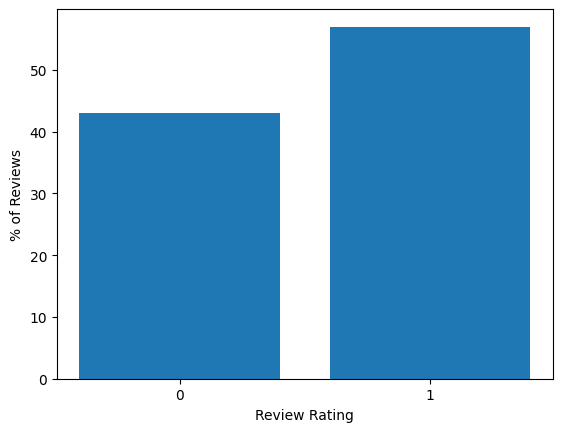

Class imbalance: [0.43 0.57]


In [5]:
value, counts = np.unique(hr_df['Reviewer_Score'], return_counts=True)
normalized_counts = counts / counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")
    

### The balance in the y value is close. About 43% for negative and 57% positive.

> #### The reviews have been spell checked. Also, I cleaned up some of the times in the reviews. The Tokenizer is nltk.WordNetLemmatizer and the tokens are text of individual words. The Tokenizer is part of the init of the Vectorizer.

#### Remove stop words before adding prefixs to text.

In [10]:
# From Chat GPT. This is to remove stop words before CountVectorizer because a prefix
# is being added before CountVectorizer. With the prefix lemmatization and stopwords will
# not work. 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

# Apply the function to remove stopwords
hr_df['Positive_Review'] = hr_df['Positive_Review'].apply(remove_stopwords)
hr_df['Negative_Review'] = hr_df['Negative_Review'].apply(remove_stopwords)
#############################################################

[nltk_data] Downloading package stopwords to /home/jay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/jay/nltk_data...
[nltk_data] Downloading package punkt to /home/jay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Perform lemmatization before adding prefixes to the text.

In [12]:
# From Chat GPT
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

# Apply the lemmatization function
hr_df['Positive_Review'] = hr_df['Positive_Review'].apply(lemmatize_text)
hr_df['Negative_Review'] = hr_df['Negative_Review'].apply(lemmatize_text)

#### Add prefix to words as per Preprocessing Step

In [13]:
# Function to append prefix to each word in the text
def append_prefix(text, prefix):
    words = text.split()
    prefixed_words = [prefix + word for word in words]
    return ' '.join(prefixed_words)

prefix = 'pos_'
hr_df['Positive_Review'] = hr_df['Positive_Review'].apply(lambda x: append_prefix(x, prefix))
prefix = 'neg_'
hr_df['Negative_Review'] = hr_df['Negative_Review'].apply(lambda x: append_prefix(x, prefix))


In [50]:
hr_df.head()

,index,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed,Date
0,0,194,7.7,neg_angry neg_made neg_post neg_available neg_...,397,1403,pos_park pos_outside pos_hotel pos_beautiful,11,7,0,...,1,1,0,0,0,0,0,1,6,2017-08-03
1,1,194,7.7,neg_negative,0,1403,pos_real pos_complaint pos_hotel pos_great pos...,105,7,0,...,0,1,0,0,0,0,0,1,4,2017-08-03
2,2,194,7.7,neg_room neg_nice neg_elderly neg_bit neg_diff...,42,1403,pos_location pos_good pos_staff pos_cute pos_h...,21,9,0,...,0,1,0,0,0,0,0,1,3,2017-07-31
3,3,194,7.7,neg_room neg_dirty neg_afraid neg_walk neg_bar...,210,1403,pos_great pos_location pos_nice pos_surroundin...,26,1,0,...,0,1,0,0,0,0,0,1,3,2017-07-31
4,4,194,7.7,neg_booked neg_withe neg_company neg_line neg_...,140,1403,pos_amazing pos_location pos_building pos_roma...,8,3,0,...,1,1,0,0,0,0,0,1,2,2017-07-24


> #### Split the data into train and test sets and transform the positive and negative review columns using a CountVectorizer.

In [14]:
Xh = hr_df[['Positive_Review','Negative_Review']]
y = hr_df['Reviewer_Score']

In [15]:
# Sanity Check
Xh.head()

,Positive_Review,Negative_Review
0,pos_park pos_outside pos_hotel pos_beautiful,neg_angry neg_made neg_post neg_available neg_...
1,pos_real pos_complaint pos_hotel pos_great pos...,neg_negative
2,pos_location pos_good pos_staff pos_cute pos_h...,neg_room neg_nice neg_elderly neg_bit neg_diff...
3,pos_great pos_location pos_nice pos_surroundin...,neg_room neg_dirty neg_afraid neg_walk neg_bar...
4,pos_amazing pos_location pos_building pos_roma...,neg_booked neg_withe neg_company neg_line neg_...


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xh, y, test_size=0.25, random_state=24, stratify=y)
print(X_train)

                                          Positive_Review  \
422668  pos_possibly pos_complain pos_golden pos_tulip...   
352677  pos_breakfast pos_hotel pos_expensive pos_34 p...   
278616                     pos_food pos_high pos_standard   
322126  pos_overall pos_enjoyable pos_experience pos_e...   
33661   pos_nice pos_area pos_recommend pos_also pos_h...   
...                                                   ...   
113462  pos_clean pos_comfortable pos_good pos_leisure...   
272155                   pos_clean pos_great pos_location   
131615                                       pos_positive   
321665                                       pos_location   
322763  pos_excellent pos_breakfast pos_laundry pos_se...   

                                          Negative_Review  
422668                                       neg_negative  
352677  neg_bed neg_little neg_bit neg_soft neg_option...  
278616                                neg_kettle neg_room  
322126                     

#### The 500 feature limit stated in the Preprocessing instructions yielded lower performance. About 2000 features were used instead.

In [22]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

#Chat GPT
def custom_tokenizer(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens
################################

# tokens
# Instantiate
# 500 Feature results in the training and test set scoring lower
bag_of_words = CountVectorizer(strip_accents='unicode',tokenizer=custom_tokenizer, min_df=0.001)
X_train_2 = X_train['Positive_Review'] + ' ' + X_train['Negative_Review']

# Fit
bag_of_words.fit(X_train_2)


# Transform
X_train_transformed = bag_of_words.transform(X_train_2)

CPU times: user 2min 34s, sys: 367 ms, total: 2min 34s
Wall time: 2min 34s


#### Check the amount of memory used.

In [23]:
# This code is from the class notebook on text.
# How much memory does our sparse matrix take up?
(X_train_transformed.data.nbytes + X_train_transformed.indptr.nbytes + X_train_transformed.indices.nbytes)*8/1024/1024

547.568115234375

#### This section deviates from the class notebook due to the size of the data.  The code from class causes the development machine to run out of memory. The flowing code is a work around.

#### Get the words from the bag of words and store them in a dictionary.

In [24]:
# Create a dictionary with the bag of words as keys for word count.
# This is do to the size of the bag of words and the machine running out of memory.
name_list = bag_of_words.get_feature_names_out()
words_dict = {}
for name in name_list:
    words_dict[name] = 0

#### There are 2178 words in the dictionary.

In [25]:
len(words_dict)

2178

#### Get the word count for each word in the dictionary. 

In [26]:
# Get the words from each row of the training set
i = 0
size = len(X_train_2)
corpus = []
for text in X_train_2:
    corpus.append(text)

In [28]:
# Put the entire corpus into a single text.  The size prevents using normal methods for checking
# the count of the words.
corpus2 = ''
for row in corpus:
    corpus2 += row + ' '

#### Put each word in a list

In [29]:
# Split to perform counting
print(corpus2[0:10])
corpus3 = corpus2.split(' ')
print(corpus3[0:10])

pos_possib
['pos_possibly', 'pos_complain', 'pos_golden', 'pos_tulip', 'pos_staff', 'pos_great', 'pos_friendly', 'pos_helpful', 'pos_cleanliness', 'pos_hotel']


#### Add the word counts to the dictionary for analysis.

In [30]:
# Add counts to into the dictionary.
i = 0

for word in corpus3:
    try:
        words_dict[word] += 1
    except:
        pass
    if i % 1000000 == 0:
        print('Words Complete: ' + str(i))
    i += 1

Words Complete: 0
Words Complete: 1000000
Words Complete: 2000000
Words Complete: 3000000
Words Complete: 4000000
Words Complete: 5000000
Words Complete: 6000000
Words Complete: 7000000


#### Convert the dictionary to a dataframe and perform sanity checks.

In [31]:
# Put the word count dictionary into a dataframe
word_count_df = pd.DataFrame.from_dict(words_dict, orient='index')
# Sanity check.
word_count_df.head()

,0
n't,0
neg_,0
neg_1,6027
neg_10,4271
neg_100,915


In [32]:
word_count_df.describe()

,0
count,2178.000000
mean,2891.028926
std,8693.883994
min,0.000000
25%,611.000000
50%,1053.000000
75%,2322.500000
max,157696.000000


In [33]:
word_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2178 entries, n't to pos_young
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2178 non-null   int64
dtypes: int64(1)
memory usage: 34.0+ KB


#### Check of the low counts. Any adjustment made to move the lowest count to 10 cause more words than desired to be removed. This should be an acceptable compromise.        

In [34]:
word_count_df.sort_values(by=0, ascending=False).tail(75)

,0
neg_replenished,418
pos_classic,418
neg_state,417
neg_standing,417
neg_pub,416
...,...
pos_managed,390
pos_interest,390
neg_,0
pos_,0


#### The top word counts.

In [35]:
word_count_df.sort_values(by=0, ascending=False).head(20)

,0
neg_room,157696
pos_staff,146883
pos_location,145412
pos_room,135485
pos_hotel,97491
neg_negative,97189
pos_good,84197
pos_great,79266
pos_breakfast,64761
pos_friendly,64506


In [67]:
word_count_df.shape

(2178, 1)

# Modelling

#### Linear Regression model.

In [36]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Init
logistic_model=LogisticRegression(C=0.2, max_iter=1000)

# Fit
logistic_model.fit(X_train_transformed,y_train)

# Accuracy of training set
print(f"Train set accuracy {logistic_model.score(X_train_transformed,y_train):.2f}%")

# Data preparation.
X_test_2 = X_test['Positive_Review'] + ' ' + X_test['Negative_Review']

# Transform test data
X_test_transformed = bag_of_words.transform(X_test_2)

# Run prediction
prediction = logistic_model.predict(X_test_transformed)

# Results of test
print(f"Test set accuracy {logistic_model.score(X_test_transformed,y_test):.2f}%")
print(classification_report(y_test, prediction))

Train set accuracy 0.79%
Test set accuracy 0.79%
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     55371
           1       0.81      0.83      0.82     73429

    accuracy                           0.79    128800
   macro avg       0.79      0.78      0.78    128800
weighted avg       0.79      0.79      0.79    128800

CPU times: user 27.8 s, sys: 91.9 ms, total: 27.9 s
Wall time: 27.9 s
Compiler : 124 ms


/tmp/ipykernel_15225/452070649.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(coef_df.tail(20)["token"], rotation=90)
/tmp/ipykernel_15225/452070649.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(coef_df.head(20)["token"], rotation=90)


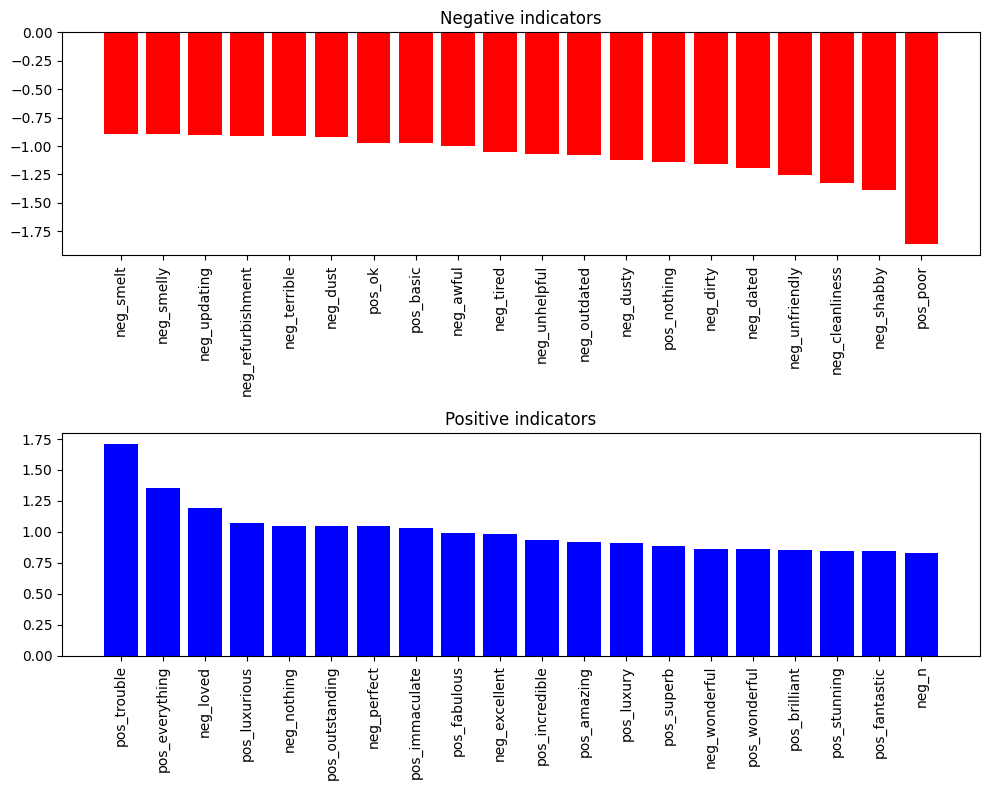

In [37]:
# Code from TA Session Notebook.
def plot_coefs(model, count_vectorizer):
    # Create a DataFrame to store the coefficients and corresponding tokens
    coef_df = pd.DataFrame({"coefficient": model.coef_[0], "token": count_vectorizer.get_feature_names_out()})
    # Sort by coefficients
    coef_df = coef_df.sort_values("coefficient", ascending=False)

    # Create a figure with 2 subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plot tokens indicating negative sentiment with smallest coefficients
    axs[0].bar(coef_df.tail(20)["token"], coef_df.tail(20)["coefficient"], color="red")
    axs[0].set_xticklabels(coef_df.tail(20)["token"], rotation=90)
    axs[0].set_title("Negative indicators")

    # Plot tokens indicating positive sentiment with largest coefficients
    axs[1].bar(coef_df.head(20)["token"], coef_df.head(20)["coefficient"], color="blue")
    axs[1].set_xticklabels(coef_df.head(20)["token"], rotation=90)
    axs[1].set_title("Positive indicators")

    fig.tight_layout()
    plt.show()

plot_coefs(logistic_model, bag_of_words)

> #### The reviews with the most positive responds are the ones that have words in the positive column such as "everything, immaculate, perfect, outstanding, luxurious, fabulous, wonderful, amazing, incredible, fantastic, and brilliant."
> #### The reviews that are the move negative are the ones containing the words "poor, shabby, cleanliness, unfriendly, dated, dirty, dusty, unhelpful, outdated, tired, awful, filthy, terrible, and smelly".
> ### The key take way from this is that clean and updated hotels with luxuries and helpful staff get the best reviews. 

#### Decision tree with PCA, 5-Fold Cross Validation, Pipeline, and Hyperparameter adjustments.

In [45]:
%%time
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

# Chat GPT
# Custom transformer to convert sparse output to dense
class DenseTransformer(TransformerMixin, BaseEstimator):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()
#########################################################

# Init PCA
hr_pca = PCA(n_components=50)

# Init Decision tree
hr_pca_dt = DecisionTreeClassifier()

# Init Vectorizer
cv = CountVectorizer(tokenizer=custom_tokenizer, min_df=0.001)
pipeline = Pipeline([
    ('Vectorizer', cv),
    ('To_Dense', DenseTransformer()),
    ('PCA', hr_pca),
    ('Decision_Tree', hr_pca_dt)
])

# Define the parameters for GridSearch
param_grid = {
    'Decision_Tree__max_depth': [9, 10, 11],
    'Decision_Tree__min_samples_split': [35, 45, 55],
    'Decision_Tree__min_samples_leaf' : [35, 45, 55],
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=20)

# Perform the grid search
grid_search.fit(X_train_2, y_train)


/home/jay/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jay/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jay/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jay/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jay/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jay/.local/lib/python3.9/site

CPU times: user 15min 45s, sys: 3min 15s, total: 19min 1s
Wall time: 31min 8s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Vectorizer',
                                        CountVectorizer(min_df=0.001,
                                                        tokenizer=<function custom_tokenizer at 0x7fc5910370d0>)),
                                       ('To_Dense', DenseTransformer()),
                                       ('PCA', PCA(n_components=50)),
                                       ('Decision_Tree',
                                        DecisionTreeClassifier())]),
             n_jobs=20,
             param_grid={'Decision_Tree__max_depth': [9, 10, 11],
                         'Decision_Tree__min_samples_leaf': [35, 45, 55],
                         'Decision_Tree__min_samples_split': [35, 45, 55]})

In [46]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'Decision_Tree__max_depth': 10, 'Decision_Tree__min_samples_leaf': 45, 'Decision_Tree__min_samples_split': 45}
Best score: 0.7457110448891899


### Confusion Matrix on the Best Model
> #### The upper left and the lower right shows the correct predictions. The total correct prediction is 95,999 out of 128,800 or 74.5%
> #### The Lower left is the false negatives at 15,215 or 11.8%
> #### The upper right is the false positive at 17,586 or 13.7%

              precision    recall  f1-score   support

           0       0.72      0.67      0.69     55371
           1       0.76      0.80      0.78     73429

    accuracy                           0.75    128800
   macro avg       0.74      0.74      0.74    128800
weighted avg       0.74      0.75      0.74    128800



<Figure size 1000x1000 with 0 Axes>

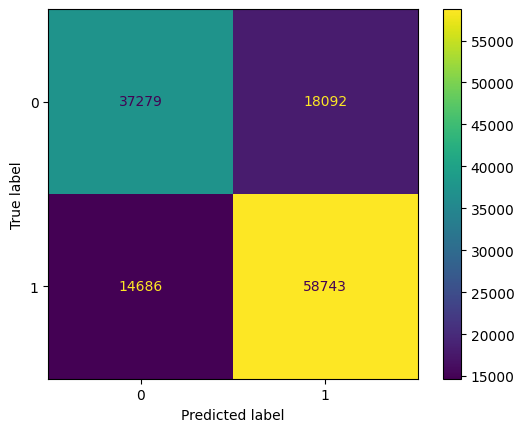

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test_2)

# # Results of test
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_disp = ConfusionMatrixDisplay(conf_matrix)
plt.figure(figsize=(10,10))
cm_disp.plot()
plt.show()

# Conclusion

## NLP Modelling
> #### Based on the performance and accuracy of both the Logistic Regression and the 5-Fold Cross Validation Decision Tree. I would use the Logistic regression as it requires less memory to train because it uses a spares matrix.  Also, logistic regression faster to train and make predictions than the decision tree.
> #### Many adjustments using pipeline and GridSearchCV were made to train the decision tree. The run time on the decision tree with 3 hyperparameters with 3 settings each and 5-Fold cross validation takes about 32 minutes.  The decision tree with Cross Validation ran on a 48 core at 2.2GHz server and used 210 GB of Memory.  The same test a 24 core pc with only 32 GB of memory took about 109 minutes. The decision tree accuracy on the predictions after all the adjustments to the hyperparameters is lower than the logistic regression model.
| Model | F1 Score | Negative | Positive |
|-|-|-|-|
| Logistic Regression | 79% | 75% | 82% |
| Decision Tree | 74% | 69% | 78% |
## Analysis of the Hotel Reviews
> #### Several discoveries had been made by performing an EDA on the dataset.
>> ##### 1. That 1.0 improvement in the average hotel review score results in a 20% plus increase in reviewer score.
>> ##### 2. That people on leisure trips have higher average ratings and stay longer on average.
>> ##### 3. That the hotels had a slight increase in average reviewer score over the last 700 days.
> #### NLP led to some meaningful discoveries as well.
>> ##### The main words that led to low scores are cleanliness, staff quality of service, and how dated the hotel appeared.  The positive words hinted to how clean the hotels are, great staff, and how luxurious the hotels are.
### Based on the analysis performed my recommendation for improving customer reviews are the following.
> #### For lower scoring hotels, hire high quality staff even if it cost more. This is because it will have an immediate effect on experience of the customers and cost less than renovations. Having a better quality staff will increase the number of visitors and will allow for increases in room prices. After the hotels increase profits it should be invested in renovations. The renovations will allow the hotel to attract more leisure trip customers who stay 6.25% longer on average.  The updates may also allow for the rate of the rooms to increase as well.